In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [5]:
diabet = pd.read_csv("diabetes.csv")
print ("Shape of dataset: ", diabet.shape)

diabet.head(20)

Shape of dataset:  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
print ("Shape of dataset before cleaning: ", diabet.size)
diabet[[ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = diabet[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].apply(pd.to_numeric, errors='coerce')
diabet = diabet.dropna()
diabet = diabet.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", diabet.size)
diabet.head(10)

Shape of dataset before cleaning:  6912
Shape of dataset after cleaning:  6912


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
diabet = diabet.drop(['Outcome'], axis = 1)
diabet.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [8]:
featureset = pdf[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [10]:
from sklearn.preprocessing import StandardScaler
x = featureset.values #returns a numpy array
standard_scaler = StandardScaler()
feature_mtx = standard_scaler.fit_transform(x)
feature_mtx [:8]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741]])

In [11]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         3.22924385 3.25837474 ... 2.72463806 2.97509995 3.4017847 ]
 [3.22924385 0.         4.26273005 ... 1.99408342 2.6650958  0.91047974]
 [3.25837474 4.26273005 0.         ... 3.09591822 3.29725594 4.32363443]
 ...
 [2.72463806 1.99408342 3.09591822 ... 0.         2.69881799 2.01762486]
 [2.97509995 2.6650958  3.29725594 ... 2.69881799 0.         3.04917966]
 [3.4017847  0.91047974 4.32363443 ... 2.01762486 3.04917966 0.        ]]


In [12]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 3, 1, 3, 2, 3, 3, 1, 0, 1, 3, 1, 1, 0, 1, 1, 0, 3, 0, 3, 0, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 0, 3, 1, 1, 3, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 0, 2, 0, 3, 1, 3, 3, 1, 3,
       3, 1, 3, 1, 3, 1, 1, 0, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 0, 3, 3, 1, 1, 1, 3, 3, 3, 0, 3, 1, 1, 3, 0, 0, 3, 3, 1, 1, 1,
       1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 3, 1, 0, 3, 1, 3, 1, 3, 0, 3, 1, 0,
       1, 1, 3, 3, 3, 1, 1, 1, 0, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 3, 1,
       1, 0, 1, 1, 1, 3, 3, 3, 3, 1, 0, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3,
       0, 0, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1,
       0, 1, 1, 1, 3, 3, 3, 1, 2, 0, 1, 0, 3, 3, 3, 1, 1, 0, 1, 3, 3, 3,
       3, 3, 1, 1, 1, 0, 0, 3, 1, 3, 3, 3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1,
       3, 3, 1, 0, 3, 1, 1, 3, 3, 3, 1, 0, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1,
       0, 0, 3, 1, 3, 3, 2, 0, 3, 1, 0, 1, 1, 1, 1,

In [14]:
diabet['cluster_'] = agglom.labels_
diabet.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster_
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,3
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,3
4,0,137,40,35,168,43.1,2.288,33,2
5,5,116,74,0,0,25.6,0.201,30,3
6,3,78,50,32,88,31.0,0.248,26,3
7,10,115,0,0,0,35.3,0.134,29,1
8,2,197,70,45,543,30.5,0.158,53,0
9,8,125,96,0,0,0.0,0.232,54,1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


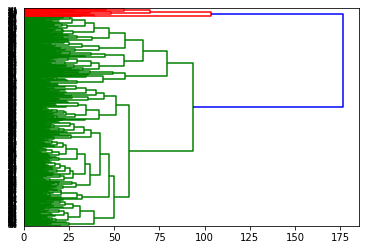

In [16]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z, orientation='right')